# Chapter 1 System of Linear Equations and Matrix

## 1.1 System of Linear Equations

### Matrix Reduction to Row-Echelon Form



In [1]:
import numpy as np

In [1]:
from sympy import *
init_printing(use_unicode=True)

In [3]:
A=Matrix([[1/2,1/3,1,1],[1,5/3,3,3],[2,4/3,5,2]])

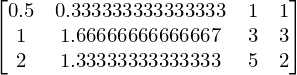

In [5]:
A

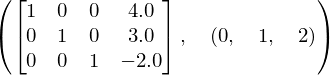

In [6]:
A.rref()

The 3x4 matrix is your matrix in RRE (watch out for floating point precision), and the 1x3 matrix lists the indices of your pivot vars.

### Steps for Gaussian Elimination
#### Step 1: Print augmented matrix

In [21]:
def print_agmatrix(info, m):
    i=0; j=0; l=len(m)
    print(info)
    for i in range(0,l):
        line=""
        for j in range(0,l+1):
            line=line+str(m[i][j])+"\t"
            if j==l-1:
                line=line+"|"
        print(line)
    print("")

In [21]:
matrix = np.array([[2.0,   0.0, - 2.0,   0.0], 
              [0.0,   2.0, - 1.0,   0.0], 
              [0.0,   1.0,   0.0,  10.0]], dtype=np.float64)

In [22]:
swap_row(matrix,0,1)

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [23]:
print_agmatrix('initial matrix', matrix)

initial matrix
2.0	0.0	-2.0	|0.0	
0.0	2.0	-1.0	|0.0	
0.0	1.0	0.0	|10.0	



#### Step 2: Elementary transformation

In [24]:
def swap(a,b):
    t=a; a=b; b=t

In [31]:
def solve(mat,b,n):
    global m; m=mat
    global s;
    
    i=0;j=0;row_pos=0;col_pos=0;ik=0;jk=0;mik=0.0;temp=0.0
    
    n=len(m)
    
    #row_pos label行循环 col_pos label列循环
    
    print_agmatrix('Initial matrix', m)
    
    while row_pos<n and col_pos<n:
        print("position: row_pos=%d, col_pos=%d" %(row_pos, col_pos))
        # 选主元
        mik = -1
        for i in range(row_pos,n):
            if abs(m[i][col_pos])>mik:
                mik=abs(m[i][col_pos])
                ik=i
                
        if mik==0:
            col_pos+=1
            continue
            
        print_agmatrix("选主元",m)
        
        #Swap two rows
        if ik !=row_pos:
            for j in range(col_pos, n+1):
                swap(m[row_pos][j], m[ik][j])
        print_agmatrix("Swap two rows", m)
        
        try:#elimination
            m[row_pos][n]=m[row_pos][n]/m[row_pos][col_pos]
        except ZeroDivisionError:
            return 0
        
        j=n-1
        while j>=col_pos:
            m[row_pos][j]/=m[row_pos][col_pos]
            j=j-1
            
        for i in range(0,n):
            if i==row_pos:
                continue
            m[i][n]=m[i][n]-m[row_pos][j]*m[i][col_pos]
            j = n - 1
            while( j >= col_pos ):
                m[i][j] -= m[row_pos][j] * m[i][col_pos]
                j = j - 1
 
 
        print_agmatrix( "消元", m )
        row_pos = row_pos + 1; col_pos = col_pos + 1
 
 
    for i in range( row_pos, n ):
        if( abs( m[i][n] ) == 0.0 ):
            return 0
    return 1
 
 
if __name__ == '__main__':
    matrix = [[2.0,   0.0, - 2.0,   0.0], 
              [0.0,   2.0, - 1.0,   0.0], 
              [0.0,   1.0,   0.0,  10.0]]
 
 
    i = 0; j = 0; n = 0
    
 
    # 求解方程组, 并输出方程组的可解信息
    ret = solve( matrix, 0, 0 )
    
    if( ret!= 0 ):
        print("方程组有解\n")
    else:
        print ("方 程组无唯一解或无解\n")
 
 
    # 输出方程组及其解
    print_agmatrix( "方程组及其解", matrix )
    for i in range( 0, len( m ) ):
        print ("x[%d] = %6.4f" % (i, m[i][len( m )]))

Initial matrix
2.0	0.0	-2.0	|0.0	
0.0	2.0	-1.0	|0.0	
0.0	1.0	0.0	|10.0	

position: row_pos=0, col_pos=0
选主元
2.0	0.0	-2.0	|0.0	
0.0	2.0	-1.0	|0.0	
0.0	1.0	0.0	|10.0	

Swap two rows
2.0	0.0	-2.0	|0.0	
0.0	2.0	-1.0	|0.0	
0.0	1.0	0.0	|10.0	

消元
1.0	0.0	-1.0	|0.0	
0.0	2.0	-1.0	|0.0	
0.0	1.0	0.0	|10.0	

position: row_pos=1, col_pos=1
选主元
1.0	0.0	-1.0	|0.0	
0.0	2.0	-1.0	|0.0	
0.0	1.0	0.0	|10.0	

Swap two rows
1.0	0.0	-1.0	|0.0	
0.0	2.0	-1.0	|0.0	
0.0	1.0	0.0	|10.0	

消元
1.0	0.0	-1.0	|0.0	
0.0	1.0	-0.5	|0.0	
0.0	0.0	0.5	|10.0	

position: row_pos=2, col_pos=2
选主元
1.0	0.0	-1.0	|0.0	
0.0	1.0	-0.5	|0.0	
0.0	0.0	0.5	|10.0	

Swap two rows
1.0	0.0	-1.0	|0.0	
0.0	1.0	-0.5	|0.0	
0.0	0.0	0.5	|10.0	

消元
1.0	0.0	0.0	|0.0	
0.0	1.0	0.0	|0.0	
0.0	0.0	1.0	|20.0	

方程组有解

方程组及其解
1.0	0.0	0.0	|0.0	
0.0	1.0	0.0	|0.0	
0.0	0.0	1.0	|20.0	

x[0] = 0.0000
x[1] = 0.0000
x[2] = 20.0000


## Another method

In [2]:
#swap rows for integer elements
def swap_row(A,i,j):
    m,n=A.shape
    if i>=m or j>=m:
        print("Error: out of index")
    else:
        A[i]=A[i]^A[j]
        A[j]=A[i]^A[j]
        A[i]=A[i]^A[j]
    return A

In [8]:
swap_row(a,0,1)

array([[ 0,  0,  2, -8, -1],
       [ 0,  0,  0,  0,  1],
       [ 1,  6,  2, -5, -2]])

In [2]:
def arguemented_mat(a, b):
    return np.c_[a,b]

# 变成阶梯矩阵
def trape_mat(sigma):
    m,n = sigma.shape
    #保存主元所在的列数，一般来说，每行都有一个主元，除非某行全零
    main_factor = []
    main_col = 0
    while main_col < n and len(main_factor) < m:
        # 当行数多于列数的时候，出现所有的列已经处理完，结束
        if main_col == n:
            break
        # 逐列找主元,若该列全零（从第i行往下），则没有主元
        # 当前查找小矩阵首行所在原矩阵的行号
        first_row = len(main_factor)
        while main_col < n:
            new_col = sigma[first_row:, main_col]
            not_zeros = np.where(new_col > 0)[0]
            # 若该列没有非零值，则该列非主元列
            if len(not_zeros) == 0:
                main_col += 1
                break

            # 否则通过行变换找到主元
            else:
                main_factor.append(main_col)
                index = not_zeros[0]
                # 若首个元素不是主元,需要行变换
                if index != 0:
                    sigma = swap_row(sigma, first_row, first_row + index)
                # 把该主元下面的元素全部变成0
                if first_row < m - 1:
                    for k in xrange(first_row+1, m):
                        times = float(sigma[k, main_col]) / sigma[first_row, main_col]
                        sigma[k] = sigma[k] - times * sigma[first_row]
                # 处理完当前主元列之后继续
                main_col += 1
                break
    return sigma, main_factor


# 回代求解
def back_solve(sigma, main_factor):
    # 判断是否有解
    if len(main_factor) == 0:
        print 'wrong main_factor ...'
        return None
    m,n = sigma.shape
    if main_factor[-1] == n-1:
        print 'no answer ...'
        return None
    # 把所有的主元元素上方的元素变成0
    for i in range(len(main_factor)-1,-1,-1):
        factor = sigma[i, main_factor[i]]
        sigma[i] = sigma[i] / float(factor)
        for j in xrange(i):
            times = sigma[j, main_factor[i]]
            sigma[j] = sigma[j] - float(times)*sigma[i]
    # 先看看结果对不对
    return sigma

# 结果打印
def print_result(sigma, main_factor):
    if sigma is None:
        print 'no answer ...'
        return 
    m,n = sigma.shape
    result = [''] * (n-1)
    main_factor = list(main_factor)
    for i in range(n-1):
        # 如果不是主元列，则为自由变量
        if i not in main_factor:
            result[i] = 'x_' + str(i+1) + '(free var)'
        # 否则是主元变量，从对应的行，将主元变量表示成非主元变量的线性组合
        else:
            # row_of_maini表示该主元所在的行
            row_of_maini = main_factor.index(i)
            result[i] = str(sigma[row_of_maini, -1])
            for j in range(i+1, n-1):
                ratio = sigma[row_of_maini, j]
                if ratio > 0:
                    result[i] = result[i] + '-' + str(ratio) + 'x_' + str(j+1)
                if ratio < 0:
                    result[i] = result[i] + '+' + str(-ratio) + 'x_' + str(j+1)
    print '方程的通解是：\n', 
    for i in range(n-1):
        print 'x_' + str(i+1), '=', result[i]            


# 得到简化的阶梯矩阵和主元列
def solve(a,b):
    sigma = arguemented_mat(a,b)
    print '增广矩阵为：'
    print sigma
    sigma, main_factor = trape_mat(sigma)
    sigma = back_solve(sigma, main_factor)
    print '方程的简化阶梯矩阵:'
    print sigma
    print '方程的主元列为：'
    print main_factor
    print_result(sigma, main_factor)
    return sigma, main_factor


if __name__ == '__main__':
    a = np.array([[1,6,2,-5,-2], [0,0,2,-8,-1], [0,0,0,0,1]])
    b = np.array([-4, 3, 7])
    sigma,mf  = solve(a,b)
    print '*' * 20
    a = np.array([[1,0,-5], [0,1,1], [0,0,0]])
    b = np.array([1,4,0])
    sigma,mf  = solve(a,b)
    print '*' * 20

增广矩阵为：
[[ 1  6  2 -5 -2 -4]
 [ 0  0  2 -8 -1  3]
 [ 0  0  0  0  1  7]]
方程的简化阶梯矩阵:
[[ 1  6  0  3  0  0]
 [ 0  0  1 -4  0  5]
 [ 0  0  0  0  1  7]]
方程的主元列为：
[0, 2, 4]
方程的通解是：
x_1 = 0-6x_2-3x_4
x_2 = x_2(free var)
x_3 = 5+4x_4
x_4 = x_4(free var)
x_5 = 7
********************
增广矩阵为：
[[ 1  0 -5  1]
 [ 0  1  1  4]
 [ 0  0  0  0]]
方程的简化阶梯矩阵:
[[ 1  0 -5  1]
 [ 0  1  1  4]
 [ 0  0  0  0]]
方程的主元列为：
[0, 1]
方程的通解是：
x_1 = 1+5x_3
x_2 = 4-1x_3
x_3 = x_3(free var)
********************


In [4]:
swap_row(a,0,2)

array([[ 0,  0,  0,  0,  1],
       [ 0,  0,  2, -8, -1],
       [ 1,  6,  2, -5, -2]])

In [26]:
a = np.array([[1,6,2,-5,-2], [0,0,2,-8,-1], [0,0,0,0,1]])

In [9]:
a[0]^a[2]

array([1, 6, 0, 3, 1])

In [12]:
a[0]^a[1]

array([1, 6, 0, 3, 1])

In [14]:
a[0]

array([ 1,  6,  2, -5, -2])

In [15]:
a[1]

array([ 0,  0,  2, -8, -1])

In [16]:
a[0]^a[1]

array([1, 6, 0, 3, 1])

In [24]:
a[[0,1]]=a[[1,0]]

In [25]:
a

array([[ 0,  0,  2, -8, -1],
       [ 1,  6,  2, -5, -2],
       [ 0,  0,  0,  0,  1]])

In [27]:
a

array([[ 1,  6,  2, -5, -2],
       [ 0,  0,  2, -8, -1],
       [ 0,  0,  0,  0,  1]])

In [28]:
a[[0,1]]=a[[1,0]]
a

array([[ 0,  0,  2, -8, -1],
       [ 1,  6,  2, -5, -2],
       [ 0,  0,  0,  0,  1]])